In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive (17).zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [6]:
# Define the paths to your dataset
train_dir = '/content/Shoe vs Sandal vs Boot Dataset'

# Define image parameters
img_height, img_width = 150, 150  # You can change these values
batch_size = 32

# Image data generator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image data generator for validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'sparse_categorical' if you have integer labels
)

# Split the dataset for validation
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ensure you are using the same shuffle for validation
)


Found 15000 images belonging to 3 classes.
Found 15000 images belonging to 3 classes.


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # To check the model architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=10  # You can adjust the number of epochs
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 942s 2s/step - accuracy: 0.5599 - loss: 0.9158 - val_accuracy: 0.7679 - val_loss: 0.4937
Epoch 2/10
  1/468 ━━━━━━━━━━━━━━━━━━━━ 9:33 1s/step - accuracy: 0.7500 - loss: 0.5707

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 622us/step - accuracy: 0.7500 - loss: 0.5707 - val_accuracy: 0.7500 - val_loss: 0.5943
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 948s 2s/step - accuracy: 0.7716 - loss: 0.5268 - val_accuracy: 0.8973 - val_loss: 0.2586
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 633us/step - accuracy: 0.9062 - loss: 0.3065 - val_accuracy: 0.7500 - val_loss: 0.5651
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 938s 2s/step - accuracy: 0.8382 - loss: 0.4053 - val_accuracy: 0.9107 - val_loss: 0.2329
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9062 - loss: 0.2532 - val_accuracy: 0.8333 - val_loss: 0.5592
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 970s 2s/step - accuracy: 0.8742 - loss: 0.3065 - val_accuracy: 0.9266 - val_loss: 0.1939
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 622us/step - accuracy: 0.8125 - loss: 0.3614 - val_accuracy: 0.9583 - val_loss: 0.1084
Epoch 9/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 990s 2s/step - accuracy: 0.8855 - loss: 0.2851 - val_accuracy: 0.

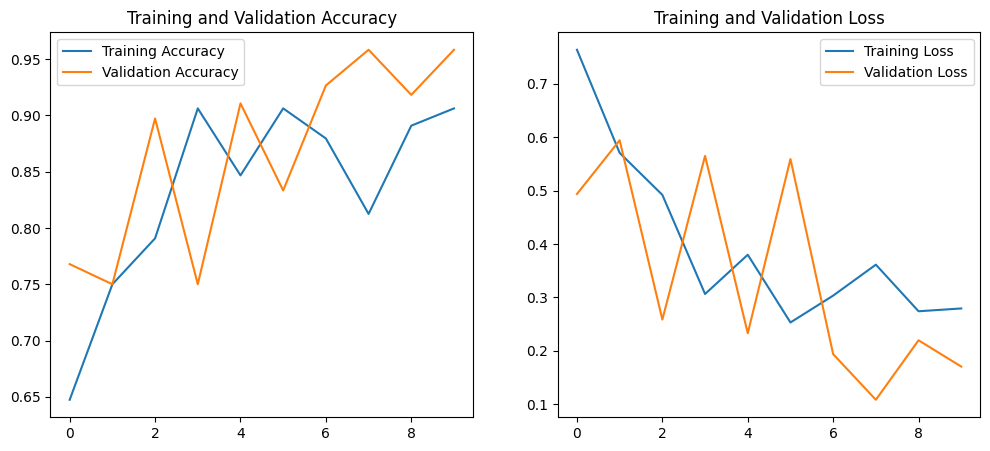

In [9]:
# Plot training and validation accuracy and loss
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_accuracy_loss(history)


In [10]:
model.save('footwear_classification_model.h5')


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image for prediction
def load_and_predict(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)
    class_indices = list(train_generator.class_indices.keys())
    predicted_class = class_indices[np.argmax(predictions)]

    return predicted_class

# Test the prediction function
result = load_and_predict('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (1003).jpg')  # Update this to the test image path
print(f'The predicted class is: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
The predicted class is: Boot
